In [127]:
import time
import tweepy
import pandas as pd
import numpy as np
import re
from textblob import TextBlob
import matplotlib.pyplot as plt

In [128]:
%run ./keys.ipynb

In [129]:
callback_uri = 'oob'

In [130]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret, callback_uri)
auth.set_access_token(access_token,access_token_secret)

In [131]:
api = tweepy.API(auth, wait_on_rate_limit=True)

In [132]:
api = tweepy.API(auth)

In [133]:
tweets = []
likes = []
        
for tweet in tweepy.Cursor(api.search, q='woolworths').items(50):
    tweets.append(tweet.text)
    likes.append(tweet.favorite_count)

In [134]:
df = pd.DataFrame({'Tweet':tweets,'Likes':likes})

In [135]:
def cleanUpTweet(txt):
    txt = re.sub(r'@[A-Za-z0-9]+', '', txt)
    txt = re.sub(r'#', '', txt)
    txt = re.sub(r'RT: ', '', txt)
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', txt)
    return txt

In [136]:
df['Tweet']=df['Tweet'].apply(cleanUpTweet)

In [137]:
df.head()

,Tweet,Likes
0,RT : I guess they sell everything but law text...,0
1,RT : I guess they sell everything but law text...,0
2,RT : I guess they sell everything but law text...,0
3,RT _SA: Stay ahead of the winter style game wi...,0
4,RT : I guess they sell everything but law text...,0


In [138]:
trends_result = api.trends_place(1)

for trend in trends_result[0]["trends"]:
    print(trend["name"])

#elmalıdavası
#Elmalida2Cocuk
#お願いランキング
#身長マイナス体重は110がベストらしい
#は行でなぜモテないのか分かる
ROSÉ ON THE SEA OF HOPE
HBO Max
ドグラ・マグラ
わけほー
横浜優勝
うさほー
Merve Akman
政府検討
引き分け
五輪無観客論
Rahmi Akman
土砂降り
Louder Than Bombs
Housemarque
フラカン
NOW LOVE EM DOIS DIAS
Kazuha
フェアリー
コールド
Bluepoint
万葉くん
José Luis Moreno
まん延防止
消費者庁コラボ
デドダム再録
隔離施設
フランスア
岡本和真
これ牛タン
リチャ末
Força Chico
連敗ストップ
Ylenia
ラグビー五輪予選
アウトのウガンダ選手団
テレ東音楽祭
#ボンビーガール
#アメトーーク
#おいYAGOO
#VocêNuncaEsteveSozinha
#蓮汰と一緒なら何も怖くない
#로제를_바라던바다
#달페이스
#NonstopNontonEURO
#今月描いた絵を晒そう


In [139]:
import seaborn as sns

In [140]:
words_in_tweet = [tweet.lower().split() for tweet in tweets]
words_in_tweet[:2]

[['rt',
  '@badvocateagain:',
  'i',
  'guess',
  'they',
  'sell',
  'everything',
  'but',
  'law',
  'textbooks',
  'at',
  'woolworths'],
 ['rt',
  '@badvocateagain:',
  'i',
  'guess',
  'they',
  'sell',
  'everything',
  'but',
  'law',
  'textbooks',
  'at',
  'woolworths']]

In [141]:
import collections

In [142]:
import itertools

In [143]:
all_words = list(itertools.chain(*words_in_tweet))
counts = collections.Counter(all_words)
counts.most_common(30)

[('rt', 42),
 ('they', 39),
 ('at', 39),
 ('woolworths', 39),
 ('@badvocateagain:', 38),
 ('i', 38),
 ('guess', 38),
 ('sell', 38),
 ('everything', 38),
 ('but', 38),
 ('law', 38),
 ('textbooks', 38),
 ('the', 9),
 ('of', 7),
 ('for', 6),
 ('us', 5),
 ('to', 4),
 ('please', 4),
 ('dm', 4),
 ('and', 3),
 ("we'd", 3),
 ('like', 3),
 ('this', 3),
 ('a', 3),
 ('your', 3),
 ('@woolworths_sa:', 2),
 ('winter', 2),
 ('with', 2),
 ('hi', 2),
 ('look', 2)]

In [144]:
most_count = pd.DataFrame(counts.most_common(30),
                         columns=['words','count'])
most_count.head()

,words,count
0,rt,42
1,they,39
2,at,39
3,woolworths,39
4,@badvocateagain:,38


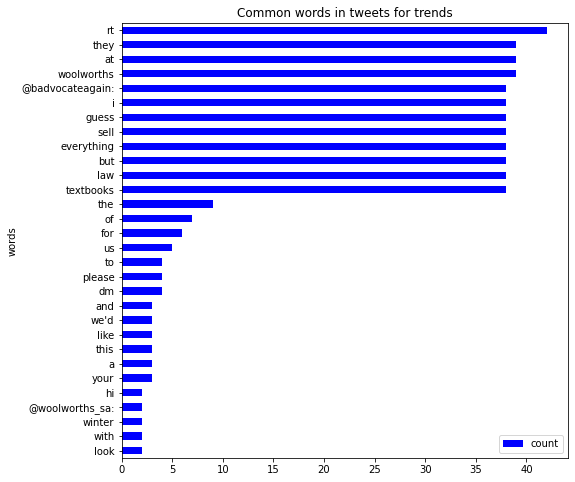

In [145]:
fig, ax = plt.subplots(figsize=(8,8))

most_count.sort_values(by='count').plot.barh(x='words',
                                             y='count',
                                             ax=ax,
                                             color="blue")
ax.set_title("Common words in tweets for trends")
plt.show()

In [146]:
import nltk
from nltk.corpus import stopwords

In [147]:
stop_words = set(stopwords.words('english'))

In [148]:
cleaned_tweets = [[word for word in tweet_words if not word in stop_words] for tweet_words in words_in_tweet]
cleaned_tweets[0]

['rt',
 '@badvocateagain:',
 'guess',
 'sell',
 'everything',
 'law',
 'textbooks',
 'woolworths']

In [149]:
all_words_cleaned = list(itertools.chain(*cleaned_tweets))
countsclean = collections.Counter(all_words_cleaned)
countsclean.most_common(30)

[('rt', 42),
 ('woolworths', 39),
 ('@badvocateagain:', 38),
 ('guess', 38),
 ('sell', 38),
 ('everything', 38),
 ('law', 38),
 ('textbooks', 38),
 ('us', 5),
 ('please', 4),
 ('dm', 4),
 ("we'd", 3),
 ('like', 3),
 ('@woolworths_sa:', 2),
 ('winter', 2),
 ('hi', 2),
 ('look', 2),
 ('you.', 2),
 ('hey', 2),
 ('contact', 2),
 ('details?', 2),
 ('sorry', 2),
 ('@woolworths_sa', 2),
 ('view', 2),
 ('stay', 1),
 ('ahead', 1),
 ('style', 1),
 ('game', 1),
 ('sneakers,', 1),
 ('boots', 1)]

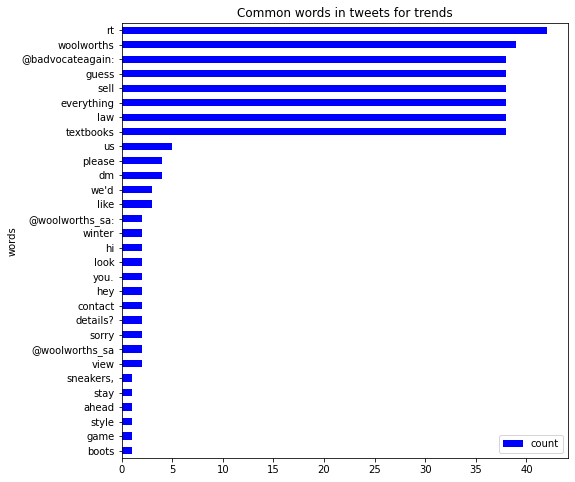

In [150]:
counts_cleaned = pd.DataFrame(countsclean.most_common(30),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8,8))

counts_cleaned.sort_values(by='count').plot.barh(x='words',
                                             y='count',
                                             ax=ax,
                                             color="blue")
ax.set_title("Common words in tweets for trends")
plt.show()